# Using Machine learning to solve a classification problem with scikit-learn.

Goal: Introduce the basic concepts of 2-class classification (binary classification) using scikit-learn and a well-documented problem, also providing a workflow so you can go and do similar things on your own data.

### Pandas and Scikit-learn
Pandas is a Python library that contains high-level data structures and manipulation tools designed for data analysis. Think of Pandas as a Python version of Excel. Scikit-learn, on the other hand, is an open-source machine learning library for Python.

While Scikit-learn does a lot of the heavy lifting, what's equally important is ensuring that raw data is processed in such a way that we are able to 'feed' it to Scikit-learn. Hence, the ability to manipulate raw data with Pandas makes it an indispensible part of our toolkit.

### Kaggle
Kaggle is the leading platform for data science competitions. Participants compete for cash prizes by submitting the best predictive model to problems posted on the competition website.

https://www.kaggle.com/competitions

We are going to deal with a kaggle competiton with data set on the titanic tragedy.we will predict if a passenger survived the sinking of the Titanic or not.



## Data overview

For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable. 
we will complete the analysis of what sorts of people were likely to survive. 
In particular, we are asked to apply the tools of machine learning to predict which passengers survived the tragedy.
 
the dataset can be obtained from 
https://www.kaggle.com/c/titanic-gettingStarted/data

## What will be covered

1. Two class classification
2. A process to build an ML model
3. Train/Test and Cross validation
4. Debugging the model


In this notebook we will look at the common practice to follow when building Machine Learning model. 
### Process to build a ML Model
1. Exploratory Data Analysis (EDA)
3. Build a simple model ( RandomForest with several features)
4. Use cross-validation in favour of Train/Test sets
5. Find worst errors and improve
6. Stop when ‘good enough’ for your needs




# 1. Exploratory Data Analysis (EDA)

In this step will look at the data so as to gain more insight about the scenario through visulization, this will aslo involve cleaning of data by handling any missing data in our data sets.

### 1. load the dataset first using panda.

In [64]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/train.csv')


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [66]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Pandas - Cleaning data

1. remove all the columns that have no contribution in predicting the labeled data. Such columns includes names, ticket number and cabin 
2. check for features with missing values, there are three common types of handling missing values for integer data type ; one either remove the reocrd/ features, Second one can replace with a mean for the case continuous data, third one can replace with the most recurrent value for the case of categorical data. you can learn more in https://www.analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/



In [67]:
df = df.drop(['Name', 'Ticket', 'Cabin','PassengerId'], axis=1)  #dropping the columns in the data set
df.isnull().sum() #finding columns with null values by count the null values


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [68]:
age_mean = df['Age'].mean()            #finding the mean of the age column
df['Age'] = df['Age'].fillna(age_mean) # replace the null values in the age column with the mean value
df.dropna(inplace = True)              #deleting records with null values (this will be the 2 records in Embarked)
df.isnull().sum() 
 

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Exercise 1
Write the code to replace the NaN values by the median, instead of the mean.

Now, since our data has no missing values we can change the dataset to be in a numerical values and later create an array of values

### Pandas - Visualizing data

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

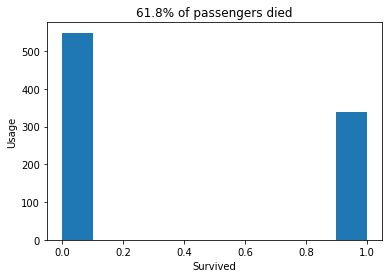

male      577
female    312
Name: Sex, dtype: int64

In [70]:
pc_survived = (1.0-(df['Survived'].sum() / df.shape[0]))*100
 
plt.hist(df['Survived'])
plt.xlabel('Survived')
plt.ylabel('Usage')
plt.title("{:2.1f}% of passengers died".format(pc_survived))
plt.show()
df['Sex'].value_counts()


male      577
female    312
Name: Sex, dtype: int64

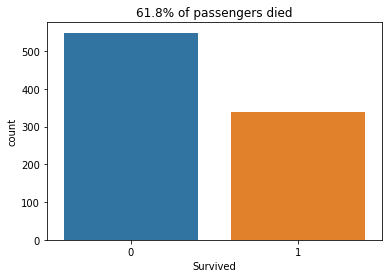

In [71]:
_=sns.countplot(df['Survived'])
pc_survived = (1.0-(df['Survived'].sum() / df.shape[0]))*100
_=plt.title("{:2.1f}% of passengers died".format(pc_survived))
df['Sex'].value_counts()

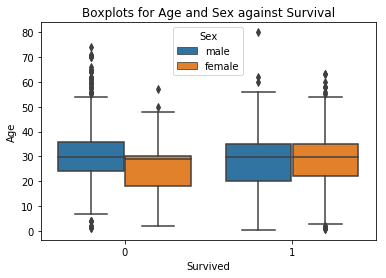

In [72]:
_=sns.boxplot(data=df, x="Survived", y="Age", hue="Sex")
_=plt.title("Boxplots for Age and Sex against Survival")


We now have to change all data to be in numerical formAt i.e sex and embarked columns should be represented in interger format

In [73]:
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1}).astype(int) 
df['Embarked'] = df['Embarked'].map({'C':1, 'S':2, 'Q':3}).astype(int)
df.to_csv('titanic_training.csv', index=False)   #saving data in csv file
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### Exercise 2
Do the same procedure for the test dataset as we have done on the training set 

In [74]:
train_data = df.values   #create a numerical array for Scikit-learn
train_data.shape


(889, 8)

# 2. Scikit-learn - Training the model

In this section, we'll simply use the model as a black box. We'll review more sophisticated techniques in later sections.

Here we'll be using the Random Forest model. The intuition is as follows: each feature is reviewed to see how much impact it makes to the outcome. The most prominent feature is segmented into a 'branch'. A collection of branches is a 'tree'. The Random Forest model, broadly speaking, creates a 'forest' of trees and aggregates the results.

http://en.wikipedia.org/wiki/Random_forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100)

We use the processed training data to 'train' (or 'fit') our model. The column Survived will be our second input, and the set of other features (with the column PassengerId omitted) as the first.

In [76]:
model = model.fit(train_data[0:,1:], train_data[0:,0])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [77]:
df_test = pd.read_csv('../data/titanic_test.csv')  #loading the test dataset
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,3
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,3
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [78]:
test_data = df_test.values
output = model.predict(test_data)

In [79]:
output  # the output can now be submitted to the kaggle competion.

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0.

# 3. Cross-Validation
We can still check how well we're doing with cross-validation. The process is as follows: we divide the training data set into two, using the first to train our model and the second to make predictions. Since we have the actual outcomes in the second data set, we can use this as a basis of comparison and calculate the accuracy of our predictions. Dividing the data set into two is called 2-fold cross-validation, with each fold being the individual partitions of the data set.

We can generate cross-validation folds automatically with Scikit-learn. KFold divides our data set into the required number of folds.

In [80]:
from sklearn.cross_validation import KFold

cv = KFold(n=len(train_data), n_folds=2)
X=train_data[0:,1:]
y=train_data[0:,0]
for training_set, test_set in cv:
    X_train = X[training_set]
    y_train = y[training_set]
    X_test = X[test_set]
    y_test = y[test_set]
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    print ("prediction accuracy:", np.sum(y_test == y_prediction)*1./len(y_test))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


prediction accuracy: 0.7842696629213484
prediction accuracy: 0.786036036036036


It is important to note that, for 2-fold cross-validation, the model is trained on a substantially smaller data set. This is why cross-validation is generally recommended across a larger number of folds, usually between 5 and 10. For 10-fold cross-validation, 9 folds serves as the training set and 1 fold as the test set.

### Exercise 3 
Try to change the fold number and see how it will affect the accuracy.

# 4. Simple Evaluation
For binary classification one can check to access how the model is perfomring by the use of a confusion matrix. A confusion matrix has 4 parts.
TP = True positive
TN = True Negative 
FP = False positive
FN = False negative

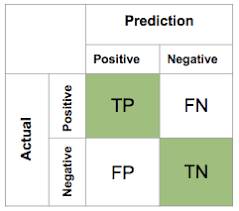

In [81]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#np.set_printoptions(precision=2)
confusion_matrix_labels = ['Died', 'Survived']
def plot_confusion_matrix_with_annots(cm, labels, cmap=plt.cm.Blues, title="Confusion matrix", ax=None):
    '''Plot a normalised confusion matrix, annotated with classification counts'''

    cm_df = pd.DataFrame(data=cm, columns=labels, index=labels).sort_index(ascending=False)
    cmn_df = cm_df.apply(lambda x: x/x.sum(), axis=1)

    if ax is None:
        fig, ax = plt.subplots()

    fmt = "" # disable string formatting, display the raw counts
    sns.heatmap(cmn_df, annot=cm_df.values, vmin=0, vmax=1, cmap=cmap, ax=ax, fmt=fmt)

    plt.ylabel('True label')
    plt.yticks(rotation=90)
    plt.xlabel('Predicted label')
    plt.xticks(rotation=45)
    plt.title(title)

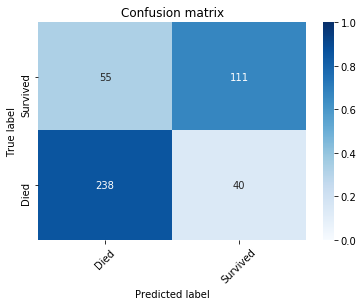

In [82]:
cm = confusion_matrix(y_test, y_prediction)
plot_confusion_matrix_with_annots(cm, labels=confusion_matrix_labels)

### Discussion 
what can you say about above confusion matrix


## Steps you might take to improve things¶
Add more features (do this first) such as:

is_miss,
maybe the port of embarkation (encoded as a boolean)
Test if increasing n_estimators helps in the RandomForest

Could you use a different value for the NaN Ages such as a mean?